In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mt

(549, 976, 3)

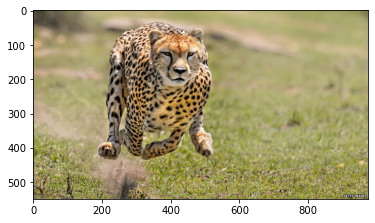

In [74]:
img = plt.imread("./assets/cheetah.jpg")
plt.imshow(img)
plt.show()
img.shape

In [103]:
_filter = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

In [104]:
def convertToGray(img):
    return (0.212*img[:,:,0]+0.701*img[:,:,1]+0.087*img[:,:,2])/225.0

def display(img):
    plt.imshow(img,cmap=mt.cm.gray)
    plt.show()
    
def resizeAccToFilter(img,filterSize=3):
    x, y = img.shape
    x_, y_ = x%filterSize, y%filterSize
    return img[0:x-x_,0:y-y_]

def multiplyWithFilter(row,noOfSplits,_filter):
    return np.hstack(np.hsplit(row,noOfSplits) @ _filter)

# hsplit: split in the direction of x that's why we provide noOf_y
# vsplit: split in the direction of y that's why we provide noOf_x

def getEdgeOfImage(img,filterSize=3):
    noOfSplits_x,noOfSplits_y = np.array(img.shape)//filterSize
    splits = np.vsplit(img,noOfSplits_x)
    rows = []
    for row in splits:
        rows.append(multiplyWithFilter(row,noOfSplits_y,_filter))
    return np.vstack(tuple(rows))

(549, 975) (549, 976)


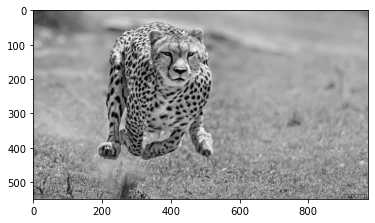

In [105]:
img_gray = convertToGray(img)
img_gray_rescale = resizeAccToFilter(img_gray)
display(img_gray_rescale)
print(img_gray_rescale.shape,img_gray.shape)

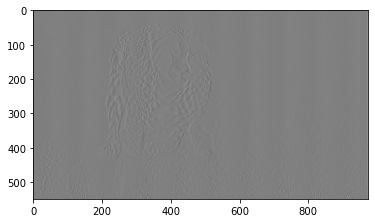

In [106]:
img_sharped = getEdgeOfImage(img_gray_rescale)
display(img_sharped)